# Tabular Playground Series - Oct 2022
  - Practice your ML skills on this approachable dataset!
  - https://www.kaggle.com/competitions/tabular-playground-series-oct-2022

# 0. 패키지

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm

# 1. 데이터셋

In [2]:
train_dtypes = dict(pd.read_csv('datasets/train_dtypes.csv').set_index('column')['dtype'])

def read_train_csv(file_no) :
    return pd.read_csv('datasets/train_{}.csv'.format(file_no), dtype=train_dtypes)

In [35]:
test_dtypes = dict(pd.read_csv('datasets/test_dtypes.csv').set_index('column')['dtype'])

test_origin = pd.read_csv('datasets/test.csv', dtype=test_dtypes).set_index('id')

# 2. 장면 시각화

In [4]:
scene_pos = ['ball_pos_x', 'ball_pos_y', 'ball_pos_z']

for i in range(6) :
    scene_pos.append('p{}_pos_x'.format(i))
    scene_pos.append('p{}_pos_y'.format(i))
    scene_pos.append('p{}_pos_z'.format(i))

In [5]:
top, bottom, left, right, height, ground = 100, -100, 82, -82, 41, 0
goal_left, goal_right, goal_height = 20, -20, 11
top_limit, bottom_limit = 120, -120

def position_3d(scene) :
    ball = np.array((scene['ball_pos_x'], scene['ball_pos_y'], scene['ball_pos_z']))

    player = np.zeros((6, 3))
    for i in range(6) :
        player[i] = [scene[f'p{i}_pos_x'], scene[f'p{i}_pos_y'], scene[f'p{i}_pos_z']]

    return ball, player
    
def draw_field_top(ax) :
    ax.vlines(bottom, right, left)
    ax.vlines(top, right, left)

    ax.hlines(goal_right, bottom_limit, bottom)
    ax.hlines(goal_left, bottom_limit, bottom)
    ax.hlines(goal_right, top, top_limit)
    ax.hlines(goal_left, top, top_limit)

def draw_field_side(ax) :
    ax.vlines(bottom, ground-1, height)
    ax.vlines(top, ground-1, height)

    ax.hlines(goal_height, bottom_limit, bottom)
    ax.hlines(goal_height, top, top_limit)

def draw_scene(scene) :
    ball_pos, players_pos = position_3d(scene)
    p_colors = ['red', 'red', 'red', 'blue', 'blue', 'blue']
    ball_color = 'black'

    fig, axes = plt.subplots(2, 1, figsize=(8, 10))

    axes[0].set_ylim(right, left)
    axes[0].set_xlim(bottom_limit, top_limit)
    draw_field_top(axes[0])
    axes[0].scatter(players_pos[:, 1], players_pos[:, 0], c = p_colors)
    axes[0].scatter(ball_pos[1], ball_pos[0], c=ball_color)

    axes[1].set_xlim(bottom_limit, top_limit)
    axes[1].set_ylim(ground, height)
    draw_field_side(axes[1])
    axes[1].scatter(players_pos[:, 1], players_pos[:, 2], c = p_colors)
    axes[1].scatter(ball_pos[1], ball_pos[2], c=ball_color)

    plt.show()

In [ ]:
tmp_df = read_train_csv(0).head()

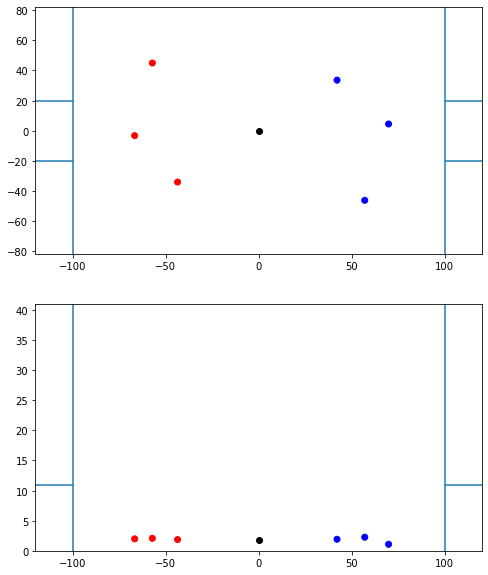

In [12]:
draw_scene(tmp_df.iloc[0][scene_pos])

# 3. Scikit-Learn

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [6]:
drop_columns = ['game_num', 'event_id', 'event_time'] + ['boost{}_timer'.format(i) for i in range(6)] + ['player_scoring_next', 'team_scoring_next']

train_origin = pd.DataFrame()

for i in tqdm(range(10)) :
    tmp_df = read_train_csv(i)
    train_origin = pd.concat([train_origin, tmp_df])

train_origin = train_origin.drop(drop_columns, axis=1)

train_origin.info()

100%|██████████| 10/10 [05:24<00:00, 32.43s/it]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21198036 entries, 0 to 2102812
Data columns (total 50 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   ball_pos_x                   float32
 1   ball_pos_y                   float32
 2   ball_pos_z                   float32
 3   ball_vel_x                   float32
 4   ball_vel_y                   float32
 5   ball_vel_z                   float32
 6   p0_pos_x                     float32
 7   p0_pos_y                     float32
 8   p0_pos_z                     float32
 9   p0_vel_x                     float32
 10  p0_vel_y                     float32
 11  p0_vel_z                     float32
 12  p0_boost                     float16
 13  p1_pos_x                     float32
 14  p1_pos_y                     float32
 15  p1_pos_z                     float32
 16  p1_vel_x                     float32
 17  p1_vel_y                     float32
 18  p1_vel_z                     float32
 19 

In [11]:
for i in range(6) :
    train_origin[f'p{i}_pos_x'].fillna(left, inplace=True)
    train_origin[f'p{i}_pos_y'].fillna(top, inplace=True)
    train_origin[f'p{i}_pos_z'].fillna(height, inplace=True)
    train_origin[f'p{i}_vel_x'].fillna(0, inplace=True)
    train_origin[f'p{i}_vel_y'].fillna(0, inplace=True)
    train_origin[f'p{i}_vel_z'].fillna(0, inplace=True)
    train_origin[f'p{i}_boost'].fillna(0, inplace=True)

train_origin.isnull().sum()

ball_pos_x                     0
ball_pos_y                     0
ball_pos_z                     0
ball_vel_x                     0
ball_vel_y                     0
ball_vel_z                     0
p0_pos_x                       0
p0_pos_y                       0
p0_pos_z                       0
p0_vel_x                       0
p0_vel_y                       0
p0_vel_z                       0
p0_boost                       0
p1_pos_x                       0
p1_pos_y                       0
p1_pos_z                       0
p1_vel_x                       0
p1_vel_y                       0
p1_vel_z                       0
p1_boost                       0
p2_pos_x                       0
p2_pos_y                       0
p2_pos_z                       0
p2_vel_x                       0
p2_vel_y                       0
p2_vel_z                       0
p2_boost                       0
p3_pos_x                       0
p3_pos_y                       0
p3_pos_z                       0
p3_vel_x  

In [12]:
rs = 22

train_Y = train_origin[['team_A_scoring_within_10sec', 'team_B_scoring_within_10sec']]
train_X = train_origin.drop(['team_A_scoring_within_10sec', 'team_B_scoring_within_10sec'], axis=1)

train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y, test_size=0.2, random_state=rs, shuffle=True)

train_X.shape, val_X.shape, train_Y.shape, val_Y.shape

((16958428, 48), (4239608, 48), (16958428, 2), (4239608, 2))

In [13]:
rfc = RandomForestClassifier()
rfc.fit(train_X, train_Y)

# 4. Torch

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from sklearn.model_selection import train_test_split

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [7]:
def to_tensor(df) :
    return torch.from_numpy(df.to_numpy())

def convert_train_dataset(X, Y) :
    return TensorDataset(to_tensor(X), to_tensor(Y))

In [62]:
def train(model, optimizer, criterion, train_dataloader) :
    model.train()

    train_loss = 0.0
    total = 0
    correct = 0

    for i, (inputs, targets) in enumerate(train_dataloader) :
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, targets.float())
        loss.backward()

        optimizer.step()
        train_loss += loss.item()
        predicted = outputs.round()

        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    total *= 2
    train_acc = correct / total * 100.
    avg_loss = train_loss / total

    return train_acc, avg_loss

def validate(model, criterion, val_dataloader) :
    model.eval()

    val_loss = 0.0
    total = 0
    correct = 0

    with torch.no_grad() :
        for i, (inputs, targets) in enumerate(val_dataloader) :
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs)
            val_loss += criterion(outputs, targets.float()).item()

            predicted = outputs.round()

            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
    
    total *= 2
    val_acc = correct / total * 100.
    avg_loss = val_loss / total

    return val_acc, avg_loss

In [12]:
class Linear1(nn.Module) :
    def __init__(self) -> None:
        super().__init__()

        self.linear = nn.Linear(48, 2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x) :
        x = self.linear(x)
        x = self.sigmoid(x)

        return x

## 4.1 테스트

In [23]:
train_origin = read_train_csv(8)
drop_columns = ['game_num', 'event_id', 'event_time'] + ['boost{}_timer'.format(i) for i in range(6)] + ['player_scoring_next', 'team_scoring_next']

train_origin = train_origin.drop(drop_columns, axis=1)

for i in range(6) :
    train_origin[f'p{i}_pos_x'].fillna(left, inplace=True)
    train_origin[f'p{i}_pos_y'].fillna(top, inplace=True)
    train_origin[f'p{i}_pos_z'].fillna(height, inplace=True)
    train_origin[f'p{i}_vel_x'].fillna(0, inplace=True)
    train_origin[f'p{i}_vel_y'].fillna(0, inplace=True)
    train_origin[f'p{i}_vel_z'].fillna(0, inplace=True)
    train_origin[f'p{i}_boost'].fillna(0, inplace=True)

train_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2151840 entries, 0 to 2151839
Data columns (total 50 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   ball_pos_x                   float32
 1   ball_pos_y                   float32
 2   ball_pos_z                   float32
 3   ball_vel_x                   float32
 4   ball_vel_y                   float32
 5   ball_vel_z                   float32
 6   p0_pos_x                     float32
 7   p0_pos_y                     float32
 8   p0_pos_z                     float32
 9   p0_vel_x                     float32
 10  p0_vel_y                     float32
 11  p0_vel_z                     float32
 12  p0_boost                     float16
 13  p1_pos_x                     float32
 14  p1_pos_y                     float32
 15  p1_pos_z                     float32
 16  p1_vel_x                     float32
 17  p1_vel_y                     float32
 18  p1_vel_z                     float32
 19  

In [24]:
train_Y = train_origin[['team_A_scoring_within_10sec', 'team_B_scoring_within_10sec']]
train_X = train_origin.drop(['team_A_scoring_within_10sec', 'team_B_scoring_within_10sec'], axis=1)

train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y, test_size=0.2, shuffle=True)

train_X.shape, val_X.shape, train_Y.shape, val_Y.shape

((1721472, 48), (430368, 48), (1721472, 2), (430368, 2))

In [25]:
train_dataset = convert_train_dataset(train_X, train_Y)
train_dataloader = DataLoader(train_dataset, batch_size=64)

val_dataset = convert_train_dataset(val_X, val_Y)
val_dataloader = DataLoader(val_dataset, batch_size=64)

In [11]:
net = Linear1().to(device)
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

In [81]:
train_acc, train_loss, val_acc, val_loss = run(net, criterion, optimizer, 50)

--- Epoch : 0 ---
Train Loss : 0.00047071252187306183
Train Acc : 93.92705687221431
--- Epoch : 0 ---
Val Loss : 0.00044684942848148876
Val Acc : 94.27126829302335
--- Epoch : 1 ---
Train Loss : 0.0004459692240074583
Train Acc : 94.2837876503922
--- Epoch : 1 ---
Val Loss : 0.00044620459822448407
Val Acc : 94.28138746664743
--- Epoch : 2 ---
Train Loss : 0.0004455343148861901
Train Acc : 94.29079548520969
--- Epoch : 2 ---
Val Loss : 0.00044595045861558157
Val Acc : 94.2842952751601
--- Epoch : 3 ---
Train Loss : 0.00044532631607869475
Train Acc : 94.2933834408062
--- Epoch : 3 ---
Val Loss : 0.0004457690329591203
Val Acc : 94.28708677133227
--- Epoch : 4 ---
Train Loss : 0.0004451762871730034
Train Acc : 94.29469195768083
--- Epoch : 4 ---
Val Loss : 0.00044562304778278985
Val Acc : 94.2876683330348
--- Epoch : 5 ---
Train Loss : 0.00044505326412569587
Train Acc : 94.29637849054146
--- Epoch : 5 ---
Val Loss : 0.00044550327089483633
Val Acc : 94.2895293304829
--- Epoch : 6 ---
Train L

## 4.2 학습

In [52]:
def preprocess_onefile(train_origin) :
    drop_columns = ['game_num', 'event_id', 'event_time'] + ['boost{}_timer'.format(i) for i in range(6)] + ['player_scoring_next', 'team_scoring_next']

    train_origin = train_origin.drop(drop_columns, axis=1)

    for i in range(6) :
        train_origin[f'p{i}_pos_x'].fillna(left, inplace=True)
        train_origin[f'p{i}_pos_y'].fillna(top, inplace=True)
        train_origin[f'p{i}_pos_z'].fillna(height, inplace=True)
        train_origin[f'p{i}_vel_x'].fillna(0, inplace=True)
        train_origin[f'p{i}_vel_y'].fillna(0, inplace=True)
        train_origin[f'p{i}_vel_z'].fillna(0, inplace=True)
        train_origin[f'p{i}_boost'].fillna(0, inplace=True)

    train_Y = train_origin[['team_A_scoring_within_10sec', 'team_B_scoring_within_10sec']]
    train_X = train_origin.drop(['team_A_scoring_within_10sec', 'team_B_scoring_within_10sec'], axis=1)

    train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y, test_size=0.2, shuffle=True)

    train_dataset = convert_train_dataset(train_X, train_Y)
    val_dataset = convert_train_dataset(val_X, val_Y)

    return train_dataset, val_dataset

def run(model, criterion, optimizer, epochs, train_loader, val_loader, log=True) :
    train_loss = []
    train_acc= []
    val_loss = []
    val_acc = []
    save_loss = float('inf')

    for i in range(epochs) :
        acc, loss = train(model, optimizer, criterion, train_loader)
        train_acc.append(acc)
        train_loss.append(loss)

        if log :
            print('--- Epoch : {} ---'.format(i))
            print('Train Loss : {}'.format(loss))
            print('Train Acc : {}'.format(acc))

        acc, loss = validate(model, criterion, val_loader)
        val_acc.append(acc)
        val_loss.append(loss)

        if log :
            print('--- Epoch : {} ---'.format(i))
            print('Val Loss : {}'.format(loss))
            print('Val Acc : {}'.format(acc))
        
        if loss < save_loss :
            torch.save(model, 'model.pt')
            save_loss = loss

    return train_acc, train_loss, val_acc, val_loss

def plot_all(train_acc, train_loss, val_acc, val_loss) :
    fig, axes = plt.subplots(2, 1)

    pd.DataFrame({'train' : train_acc, 'val':val_acc}).plot(ax=axes[0])
    axes[0].set_title('Accuracy')
    
    pd.DataFrame({'train' : train_loss, 'val':val_loss}).plot(ax=axes[1])
    axes[1].set_title('Loss')

    plt.show()

In [20]:
def run_onefile(model, criterion, optimizer, epochs, csv_file_no) :
    train_dataset, val_dataset = preprocess_onefile(csv_file_no)

    train_dataloader = DataLoader(train_dataset, batch_size=64)
    val_dataloader = DataLoader(val_dataset, batch_size=64)

    train_acc, train_loss, val_acc, val_loss = run(model, criterion, optimizer, epochs)

    return train_acc, train_loss, val_acc, val_loss

def run_all(model, criterion, epochs, log=True) :
    train_acc = []
    train_loss = []
    val_acc = []
    val_loss = []

    for i in tqdm(range(10)) :
        train_dataset, val_dataset = preprocess_onefile(i)

        train_dataloader = DataLoader(train_dataset, batch_size=64)
        val_dataloader = DataLoader(val_dataset, batch_size=64)

        optimizer = optim.SGD(model.parameters(), lr=0.001)
        t_acc, t_loss, v_acc, v_loss = run(model, criterion, optimizer, epochs, train_dataloader, val_dataloader, False)

        if log :
            print('--- File No : {} ---'.format(i))
            print('Train Loss : {}'.format(sum(t_loss) / epochs))
            print('Val Loss : {}'.format(sum(v_loss) / epochs))

        train_acc.extend(t_acc)
        train_loss.extend(t_loss)
        val_acc.extend(v_acc)
        val_loss.extend(v_loss)

    return train_acc, train_loss, val_acc, val_loss

In [ ]:
net = Linear1().to(device)
criterion = nn.MSELoss()

train_acc, train_loss, val_acc, val_loss = run_all(net, criterion, 10)

In [ ]:
plot_all(train_acc, train_loss, val_acc, val_loss)

In [26]:
net2 = torch.load('model.pt').to(device)
criterion = nn.MSELoss()

val_acc, val_loss = validate(net2, criterion, val_dataloader)

## 4.3 추론 테스트

In [20]:
def test_preprocess(test_df) :
    drop_columns = ['game_num', 'event_id', 'event_time'] + ['boost{}_timer'.format(i) for i in range(6)] + ['player_scoring_next', 'team_scoring_next']

    test_df = test_df.drop(drop_columns, axis=1, errors='ignore')

    for i in range(6) :
        test_df[f'p{i}_pos_x'].fillna(left, inplace=True)
        test_df[f'p{i}_pos_y'].fillna(top, inplace=True)
        test_df[f'p{i}_pos_z'].fillna(height, inplace=True)
        test_df[f'p{i}_vel_x'].fillna(0, inplace=True)
        test_df[f'p{i}_vel_y'].fillna(0, inplace=True)
        test_df[f'p{i}_vel_z'].fillna(0, inplace=True)
        test_df[f'p{i}_boost'].fillna(0, inplace=True)

    test_inputs = test_df.drop(['team_A_scoring_within_10sec', 'team_B_scoring_within_10sec'], axis=1, errors='ignore')

    test_inputs = to_tensor(test_inputs)

    return TensorDataset(test_inputs)

In [30]:
t_inputs, t_targets = test_preprocess(read_train_csv(8))
t_dataloader = DataLoader(t_inputs)

In [57]:
tmp_df = predict(net2, t_dataloader)
tmp_df

100%|██████████| 2151840/2151840 [02:25<00:00, 14751.22it/s]


,0,1
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
2151835,0.0,0.0
2151836,0.0,0.0
2151837,0.0,0.0
2151838,0.0,0.0


## 4.4 추론

In [31]:
def predict(model, dataloader) :
    model.eval()

    predicted = []
    with torch.no_grad() :
        for (inputs, ) in tqdm(dataloader) :
            inputs = inputs.to(device)

            outputs = model(inputs)
            preds = outputs.round().cpu().numpy().astype(np.int8)
            predicted.extend(preds)

    predict_df = pd.DataFrame(predicted)
    predict_df.columns = ['team_A_scoring_within_10sec','team_B_scoring_within_10sec']

    return predict_df

In [36]:
net = torch.load('model.pt').to(device)

test_dataset = test_preprocess(test_origin)
test_dataloader = DataLoader(test_dataset)

In [37]:
submission_df = predict(net, test_dataloader)
submission_df.index.name = 'id'

submission_df.to_csv('submission.csv')

100%|██████████| 701143/701143 [02:09<00:00, 5419.68it/s]


# 5. Submission

## 5.1 Preprocess

In [48]:
def load_scale_down() :
    train_origin = pd.DataFrame()
    
    for i in tqdm(range(10)) :
        tmp_df = read_train_csv(i)

        df_1 = pd.concat([tmp_df[tmp_df['team_A_scoring_within_10sec'] == 1], tmp_df[tmp_df['team_B_scoring_within_10sec'] == 1]])
        df_0 = tmp_df.drop(df_1.index)

        train_origin = pd.concat([train_origin, df_0.sample(len(df_1)), df_1])

    return train_origin.reset_index(drop=True)

In [49]:
train_origin = load_scale_down()
train_origin.info()

In [53]:
train_dataset, val_dataset = preprocess_onefile(train_origin)
train_dataset.tensors[0].shape, val_dataset.tensors[0].shape

AttributeError: 'tuple' object has no attribute 'shape'

In [58]:
train_dataloader = DataLoader(train_dataset, batch_size=64)
val_dataloader = DataLoader(val_dataset, batch_size=64)

## 5.2 Train

In [64]:
net = Linear1().to(device)
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

In [65]:
train_score = run(net, criterion, optimizer, 50, train_dataloader, val_dataloader)

--- Epoch : 0 ---
Train Loss : 0.001507525090155439
Train Acc : 76.50506059014597
--- Epoch : 0 ---
Val Loss : 0.001310984281510995
Val Acc : 76.5366704372079
--- Epoch : 1 ---
Train Loss : 0.0012821895399407414
Train Acc : 76.75940174280943
--- Epoch : 1 ---
Val Loss : 0.0013098714200341444
Val Acc : 76.53394221628076
--- Epoch : 2 ---
Train Loss : 0.0012812374691970605
Train Acc : 76.76272020558204
--- Epoch : 2 ---
Val Loss : 0.001308953421121907
Val Acc : 76.53462427151254
--- Epoch : 3 ---
Train Loss : 0.001280475080432055
Train Acc : 76.7641105496686
--- Epoch : 3 ---
Val Loss : 0.0013081954373366218
Val Acc : 76.53126646114069
--- Epoch : 4 ---
Train Loss : 0.001279865288203657
Train Acc : 76.76064780590586
--- Epoch : 4 ---
Val Loss : 0.001307568729918186
Val Acc : 76.53089920063127
--- Epoch : 5 ---
Train Loss : 0.00127937804233493
Train Acc : 76.75848359105416
--- Epoch : 5 ---
Val Loss : 0.0013070496868144467
Val Acc : 76.52722659553704
--- Epoch : 6 ---
Train Loss : 0.00127

KeyboardInterrupt: 

In [ ]:
plot_all(*train_score)

## 5.3 Predict

In [66]:
net = torch.load('model.pt').to(device)

test_dataset = test_preprocess(test_origin)
test_dataloader = DataLoader(test_dataset)

submission_df = predict(net, test_dataloader)
submission_df.index.name = 'id'

submission_df.to_csv('submission.csv')

100%|██████████| 701143/701143 [02:13<00:00, 5251.34it/s]
